In [1]:
import matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from read_data import read_parafac_result, get_filelist
from ipywidgets import Text, Layout
from datetime import datetime

In [2]:
filepath = "_data/_greywater/20220111_GWRT/parafac_output_RT.txt"
ex_df, em_df, score_df, info_dict = read_parafac_result(filepath) 

Reading fluorescence measurement info...
Reading Ex/Em loadings...
Reading component scores...
Reading complete


In [3]:
info_dict

{'name': '',
 'creator': 'Yongmin Hu',
 'email': '',
 'doi ISBN': '',
 'reference': '',
 'unit': '',
 'toolbox': 'EEM_python_toolkit',
 'date': '2022-02-07',
 'fluorometer': 'Horiba Aqualog',
 'nSample': '420',
 'dateset_calibration': 'Internal calibration: Raman Peak area',
 'preprocess': 'Inner_filter_effect, Rayleigh scattering masking, Gaussian smoothing.',
 'decomposition_method': 'non_negative_parafac',
 'validation': '',
 'sources': '',
 'description': ''}

In [3]:
filedir_default = "_data/_greywater/20220111_GWRT"
# dir_selection = Text(value=filedir_default,
#                                 description='File directory',
#                                 layout=Layout(width='100%'))
# display(dir_selection)

def collect_parafac_result(datdir,kw):
    datlist = get_filelist(datdir, kw)
    parafac_results = []
    for f in datlist:
        filepath = datdir + '/' + f
        ex_df, em_df, score_df, info_dict = read_parafac_result(filepath)
        d = {'filename':f ,'info':info_dict, 'ex': ex_df, 'em': em_df, 'score':score_df}
        parafac_results.append(d)
    return parafac_results

parafac_results = collect_parafac_result(filedir_default, 'output')

Reading fluorescence measurement info...
Reading Ex/Em loadings...
Reading component scores...
Reading complete


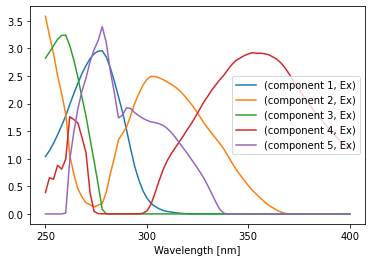

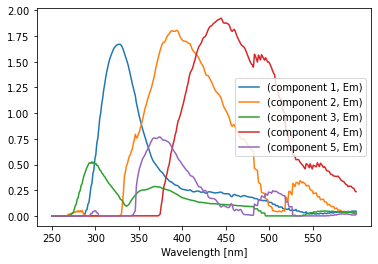

In [4]:
# compare spectra

for d in parafac_results:
    J_df = d['ex']
    K_df = d['em']
    ex_range = [w[1] for w in J_df.index]
    em_range = [w[1] for w in K_df.index]
    fig_ex = J_df.unstack(level=0).plot.line()
    handles_ex, labels_ex = fig_ex.get_legend_handles_labels()
    plt.legend(handles_ex, labels_ex, prop={'size': 10})
    plt.xticks(np.arange(ex_range[0], ex_range[-1] + 1, 50))
    plt.xlabel("Wavelength [nm]")
    fig_em = K_df.unstack(level=0).plot.line()
    handles_em, labels_em = fig_em.get_legend_handles_labels()
    plt.legend(handles_em, labels_em, prop={'size': 10})
    plt.xticks(np.arange(ex_range[0], em_range[-1], 50))
    plt.xlabel("Wavelength [nm]")


In [18]:
grab_fluorescence = pd.read_csv('_data/_greywater/20220111_grab_sample/grab_sample_fluorescence.txt', sep='\t', index_col=0)
grab_fluorescence.index = pd.to_datetime(grab_fluorescence.index, format='%d/%m/%Y %H:%M')

cell = pd.read_csv('_data/_greywater/20220111_grab_sample/tcc.txt', sep='\t', index_col=0)
cell.index = pd.to_datetime(tcc.index, format='%d/%m/%Y %H:%M')

score_df_s = score_df.reset_index(level = [0])

In [19]:
tbl = pd.DataFrame(data={'C1':score_df_s['component 1'], 
                        'Removed fluorescence':grab_fluorescence['Removed fluorescence'],
                        'TCC': cell['intact bacteria mobiFLOW-Count [Events]']})

In [15]:
pd.set_option('display.max_rows', None)
c1.sort_index()
c1['C1'] = c1['C1'].interpolate(method='linear')
c1 = c1.dropna()
c1

,C1,Filtered TF
time,,
2022-01-12 11:00:00,57.620433,491000.0
2022-01-12 16:00:00,53.053322,451000.0
2022-01-13 17:00:00,43.099396,404000.0
2022-01-14 11:00:00,50.465491,467000.0
2022-01-14 16:00:00,46.008527,414000.0
2022-01-20 12:04:00,61.998558,1480000.0
2022-01-20 12:57:00,78.944166,1210000.0
2022-01-20 14:12:00,83.281430,1530000.0
2022-01-20 17:46:00,74.751313,1350000.0


In [ ]:
plt.figure()
plt.scatter(c1['C1'])